# Description

As a first step, we need to explore and visualize our data. The goal of this step is to understand the data and identify what we need to do in the preprocessing step. <br>

The dataset has 2000 rows and 7 columns: <br>

Age - age of the client. <br>
Income - annual income of the client. <br>
Credit_Score - credit history of the client (a high value means a good history, a low value means the opposite). <br>
Loan_Amount - loan amount that the client wants to get. <br>
Loan_Term - loan term requested by the client. <br>
Employment_Status - employed, self-employed, or unemployed. <br>
Loan_Approved - target attribute, 1 - loan was approved, 2 - loan was not approved. <br><br>

Source: https://www.kaggle.com/datasets/mosaadhendam/loan-prediction-dataset

# Import libraries

In [1]:
# Import libraries and change the visualization style for future graphs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.close("all")
plt.style.use('ggplot')

# Basic information about the data

In [2]:
# Load data and change data type for column Employment_Status

df = pd.read_csv('../data/loan_prediction.csv')

df = df.astype({ 'Employment_Status' : 'category' })

In [3]:
# First few rows of the data 

df.head()

,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Loan_Approved
0,56,81788,334,15022,48,Employed,0
1,69,102879,781,21013,24,Self-Employed,1
2,46,58827,779,39687,60,Self-Employed,0
3,32,127188,364,16886,24,Unemployed,0
4,60,25655,307,26256,36,Unemployed,0


We see that five columns have a number values and one column with nominal categorical values, so in preprocessing step we will apply scaler for the number columns and one-hot-encoder for the column Employment_Status

In [4]:
# Basic information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                2000 non-null   int64   
 1   Income             2000 non-null   int64   
 2   Credit_Score       2000 non-null   int64   
 3   Loan_Amount        2000 non-null   int64   
 4   Loan_Term          2000 non-null   int64   
 5   Employment_Status  2000 non-null   category
 6   Loan_Approved      2000 non-null   int64   
dtypes: category(1), int64(6)
memory usage: 96.0 KB


The data don't have a null values, so we don't need to aplly a imputer in the future

In [5]:
# Statistical values of the columns

df.describe()

,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Loan_Approved
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,43.805500,84533.585000,577.055000,25460.315000,35.47800,0.171000
std,14.929203,37771.169751,157.525951,14116.737774,16.98587,0.376603
min,18.000000,20155.000000,300.000000,1060.000000,12.00000,0.000000
25%,31.000000,50925.250000,440.000000,13444.250000,24.00000,0.000000
50%,44.000000,84073.500000,578.500000,25446.000000,36.00000,0.000000
75%,56.000000,117523.250000,715.250000,37949.250000,48.00000,0.000000
max,69.000000,149992.000000,849.000000,49994.000000,60.00000,1.000000


# Class distribution

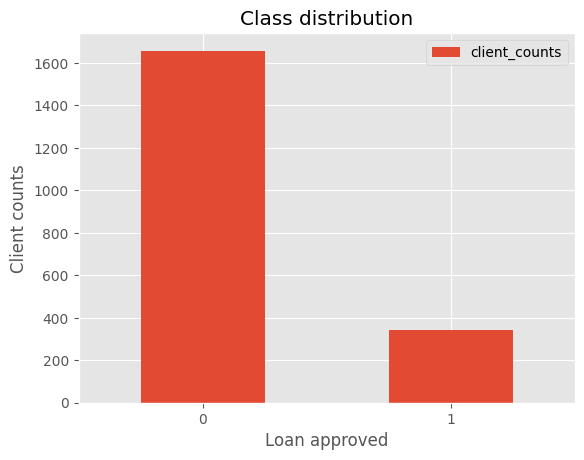

In [6]:
d = df.groupby('Loan_Approved').agg( client_counts=('Age', 'count') )

d.plot.bar(ylabel='Client counts', xlabel='Loan approved', title='Class distribution')
plt.xticks(rotation=0)
plt.show()

We see a big class imbalance, so we need to apply oversampling or undersampling in the future.

# Pairplot

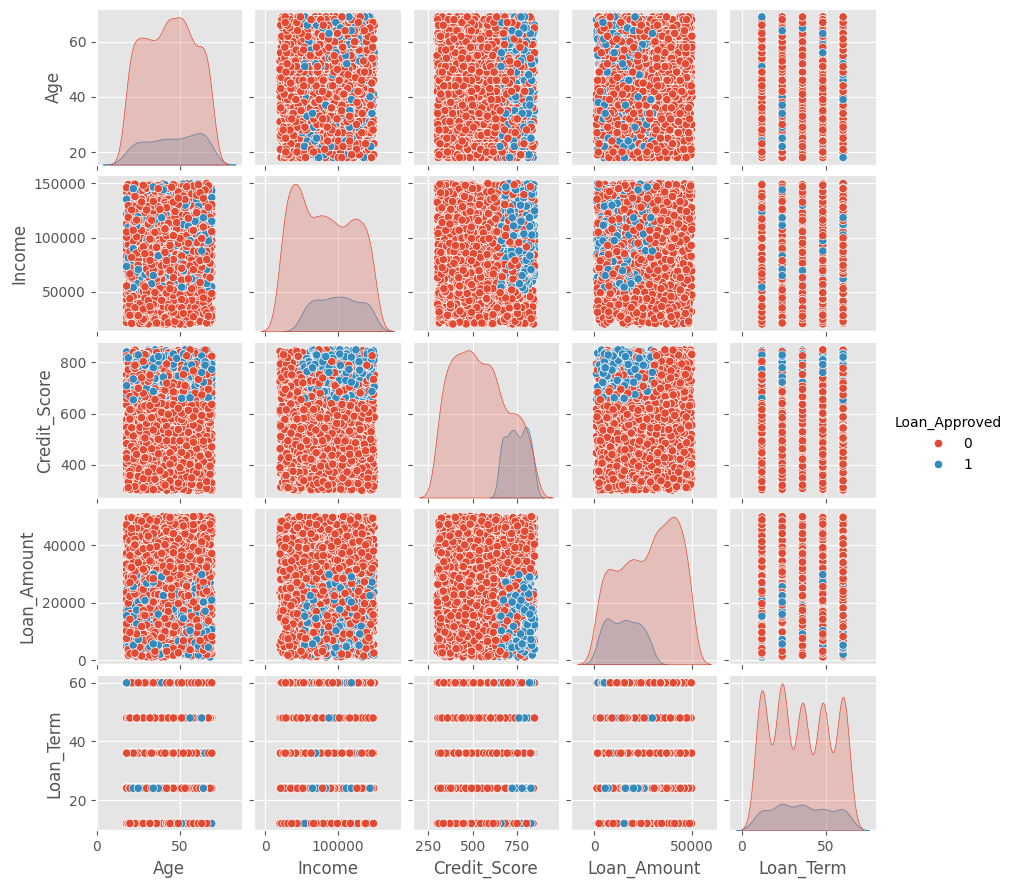

In [7]:
sns.pairplot(data=df, hue='Loan_Approved', height=1.8)
plt.show()

We see that none of the pairs of attributes give us linear separable data. But in some graphs we see a clear boundary between classes, for example Loan_Amount and Credit_Score or Income and Credit_Score.

# Correlations

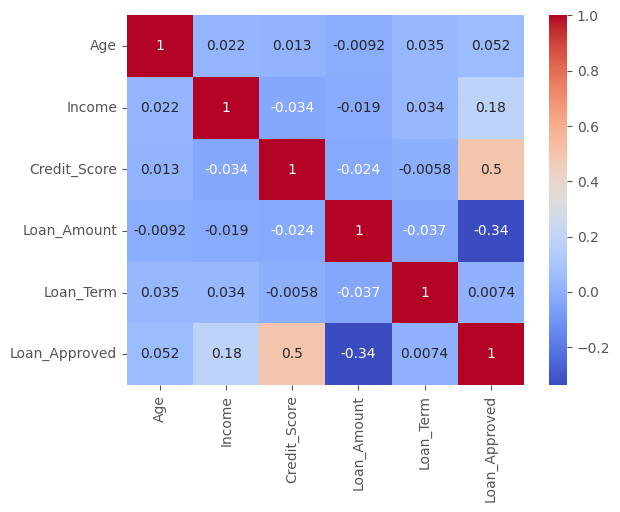

In [8]:
d = df.corr(numeric_only=True)

sns.heatmap(data=d, annot=True, cmap="coolwarm")
plt.show()

We see that none of the pairs of attributes have strong correlation, but Loan_Approved and Credit_Score, and also Loan_Approved and Loan_Amount, have moderate correlation that stands out from the others.

# Boxplots

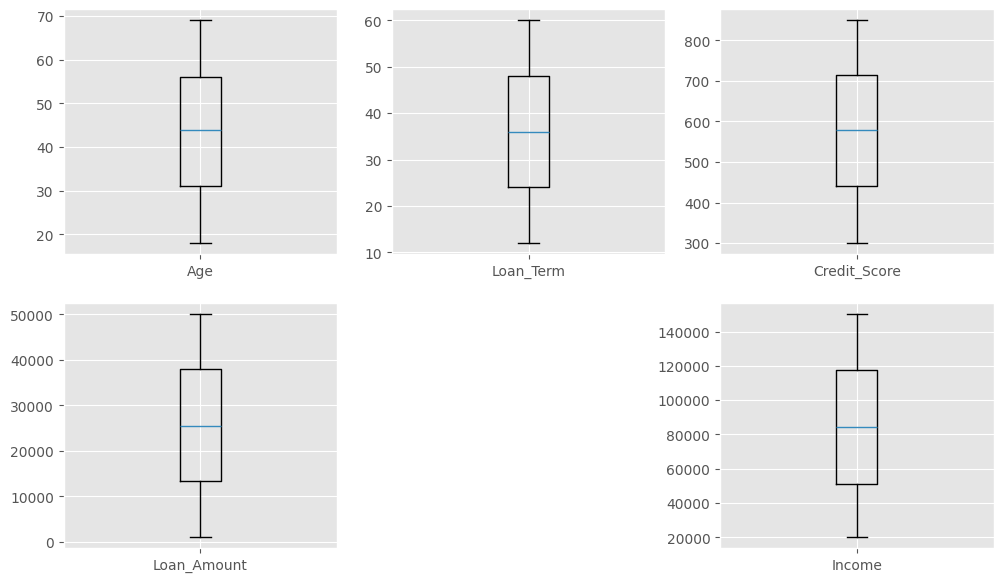

In [9]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 3, 1)
plt.boxplot(df['Age'], tick_labels=['Age'])

plt.subplot(2, 3, 2)
plt.boxplot(df['Loan_Term'], tick_labels=['Loan_Term'])

plt.subplot(2, 3, 3)
plt.boxplot(df['Credit_Score'], tick_labels=['Credit_Score'])

plt.subplot(2, 3, 4)
plt.boxplot(df['Loan_Amount'], tick_labels=['Loan_Amount'])

plt.subplot(2, 3, 6)
plt.boxplot(df['Income'], tick_labels=['Income'])


plt.show()

We see that the data has no outliers, so we can use normalization, not standardization, in the preprocessing step.

# Attributes value distributions

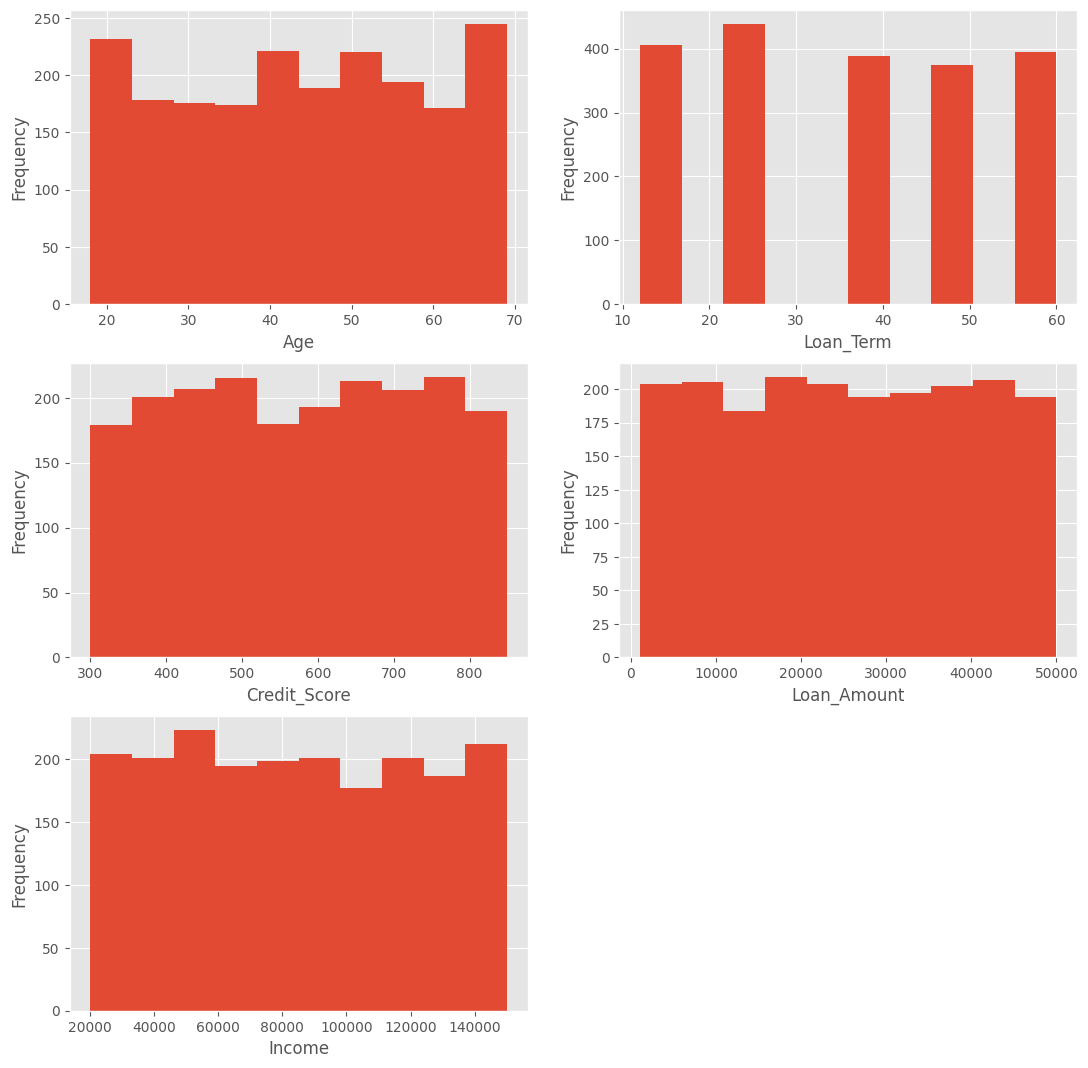

In [10]:
plt.figure(figsize=(13, 13))

plt.subplot(3, 2, 1)
df['Age'].plot.hist(xlabel='Age')

plt.subplot(3, 2, 2)
df['Loan_Term'].plot.hist(xlabel='Loan_Term')

plt.subplot(3, 2, 3)
df['Credit_Score'].plot.hist(xlabel='Credit_Score')

plt.subplot(3, 2, 4)
df['Loan_Amount'].plot.hist(xlabel='Loan_Amount')

plt.subplot(3, 2, 5)
df['Income'].plot.hist(xlabel='Income')


plt.show()

We see that each attribute has pretty evenly distributed values, except for Loan_Term. This may be because the bank does not have many loan plans. That is, the loan term is not made for each individual customer.

# Employment_Status

In the previous graphs, we explored numerical columns, but the data also has one categorical column – Employment_Status.

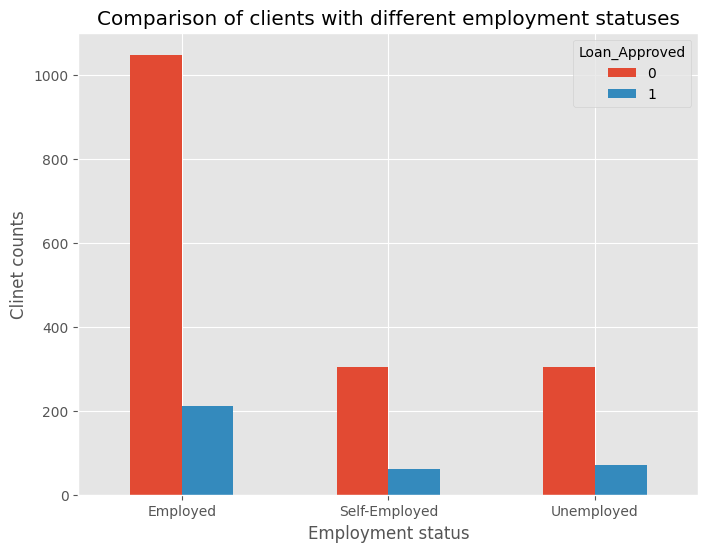

In [11]:
d = df.groupby(['Employment_Status', 'Loan_Approved'], observed=False).agg( loan_approved=('Age', 'count') )

d = d.unstack()
d.columns = d.columns.droplevel(level=0)

d[[0, 1]].plot.bar(figsize=(8, 6), xlabel='Employment status', ylabel='Clinet counts', title='Comparison of clients with different employment statuses')
plt.xticks(rotation=0)
plt.show()

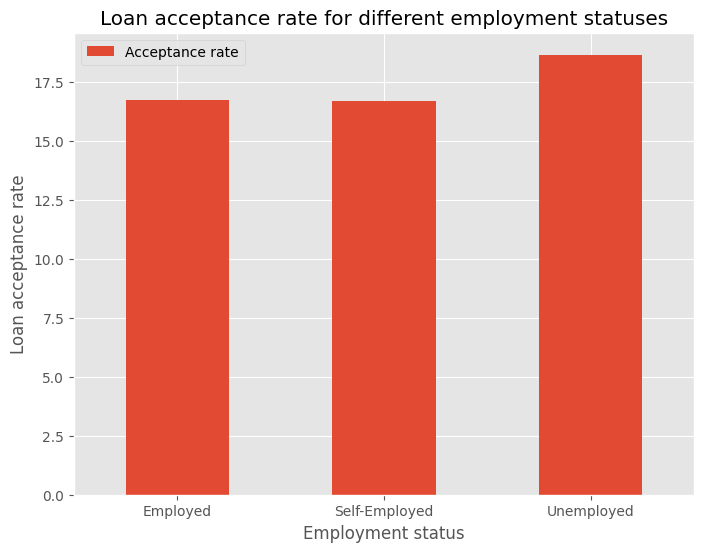

In [12]:
d.columns.name = ''

d['Acceptance rate'] = ( d[1] / ( d[0] + d[1] ) ) * 100


d[['Acceptance rate']].plot.bar(figsize=(8, 6), xlabel='Employment status', ylabel='Loan acceptance rate', 
                                title='Loan acceptance rate for different employment statuses')
plt.xticks(rotation=0)
plt.show()

We see that unemployed clients have a slightly higher acceptance rate than employed and self-employed clients. This may be due to the bank's strategy or, for example, unemployed customers taking loans for their first business.

# Conclusion of EDA

- The data has one categorical column, so in the preprocessing step we need to apply one-hot encoding. <br>
- The data has no outliers, so we can apply normalization on numerical columns. <br>
- The data has no null values, so we do not need to apply an imputer. <br>
- The data has a big class imbalance, so we need to apply oversampling or undersampling. <br>
- None of the pairs of attributes have strong correlation, but Loan_Approved and Credit_Score, and also Loan_Approved and Loan_Amount, have moderate        
  correlation that stands out. <br>
- Each attribute in the data has pretty evenly distributed values, except for Loan_Term. <br>
- Clients with all employment statuses (employed, self-employed, unemployed) have a similar loan approval rate of 16–18%. <br>